___
# PROJETO 3: PREDIÇÃO
___
    
### Integrantes:
    1. Bernardo Sarcinelli  
    2. Daniel Freitas
    3. Maria Eduarda Rocha

<div id="leitura"></div>

## INTRODUÇÃO

In [120]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Base de Dados Escolhida:
Para este projeto utilizaremos a Base de Dados referente ao 4° semestre de 2023.
O arquivo utilizado foi disponibilizado do notebook 'Leitura PNADC 2023' por meio do link
https://www.dropbox.com/scl/fi/ksca0i4ybo6hno738pjcw/pnad23_4.csv?rlkey=e186niofxka6lmmlbkefr94zw&st=wntcupiu&dl=1,
sendo baixado como 'pnad23_4' no formato csv, logo, 'pnad23_4.csv'.

In [121]:
filename = 'pnad23_4.csv'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'Esse deve ser salvo na mesma pasta em que se encontrar este arquivo jupyter notebook')

Parece que o arquivo pnad23_4.csv está na mesma pasta do notebook, yay!


In [122]:
# Leitura dos Dados correspondentes

dados = pd.read_csv('pnad23_4.csv')
print('DADOS - QUARTO SEMESTRE (2023)')
dados

DADOS - QUARTO SEMESTRE (2023)


,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,2023,4,11,11.0,NaN,110000016,1110011,1,10,5,...,309.630691,961.950570,327.243550,0.0,0.000000,0.0,674.475073,358.970348,292.658661,690.889317
1,2023,4,11,11.0,NaN,110000016,1110011,1,10,5,...,309.630691,961.950570,327.243550,0.0,0.000000,0.0,674.475073,358.970348,292.658661,690.889317
2,2023,4,11,11.0,NaN,110000016,1110011,2,10,5,...,175.916359,512.399129,176.708843,0.0,0.000000,0.0,378.226179,197.177218,158.596782,357.260151
3,2023,4,11,11.0,NaN,110000016,1110011,3,10,5,...,345.320733,1013.292950,358.249489,0.0,0.000000,0.0,758.636016,399.415616,310.512617,754.605577
4,2023,4,11,11.0,NaN,110000016,1110011,3,10,5,...,345.320733,1013.292950,358.249489,0.0,0.000000,0.0,758.636016,399.415616,310.512617,754.605577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473201,2023,4,53,53.0,NaN,530060880,5310111,12,11,3,...,0.000000,755.120680,0.000000,0.0,382.269011,0.0,778.608964,816.826409,0.000000,0.000000
473202,2023,4,53,53.0,NaN,530060880,5310111,12,11,3,...,0.000000,755.120680,0.000000,0.0,382.269011,0.0,778.608964,816.826409,0.000000,0.000000
473203,2023,4,53,53.0,NaN,530060880,5310111,14,11,3,...,0.000000,677.804483,0.000000,0.0,347.520587,0.0,682.776135,707.652015,0.000000,0.000000
473204,2023,4,53,53.0,NaN,530060880,5310111,14,11,3,...,0.000000,677.804483,0.000000,0.0,347.520587,0.0,682.776135,707.652015,0.000000,0.000000


In [123]:
# Especificação das Colunas que serão utilizadas
colunas = [
           'UF',    # Estado
           'V2007', # Sexo
           'V2010', # Cor ou raça
           'V2009', # Idade
           'V3001', # Alfabetizado
           'V3008', # Frequentou a escola
           'VD3004', # Nível de Escolaridade
           'V4012', # Tipo de ocupação
           'VD4014', # Faixa de horas trabalhadas
           'VD4017', # Rendimento Mensal Efetivo
           'V403411', # Faixa de Rendimento [em SM - Salário Mínimo]
           'V1022', # Situação do domicílio          
]   

In [124]:
# Filtrando apenas as colunas desejadas
dados_colunas = dados[colunas]

In [125]:
# Renomeando as colunas
dados_colunas = dados_colunas.rename(columns={
    'UF': 'Estado',
    'V2007': 'Sexo',
    'V2010': 'Cor_Raça',
    'V2009': 'Idade',
    'V3001': 'Alfabetizado',
    'V3008': 'Frequentou a Escola',
    'VD3004': 'Nível de Instruçao',
    'V4012': 'Tipo de Ocupacao',
    'VD4014': 'Faixa de horas trabalhadas',
    'VD4017': 'Rendimento Mensal Efetivo',
    'V403411': 'Faixa de Rendimento [em SM]',
    'V1022': 'Situacao do Domicílio'
})

In [126]:
# Reconfigurando as informações das colunas

# Estado
dados_colunas['Estado'] = dados_colunas['Estado'].astype('category')
dados_colunas['Estado'] = dados_colunas['Estado'].cat.rename_categories({
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 
    16: 'Amapá', 17: 'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 
    24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 
    28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 
    52: 'Goiás', 53: 'Distrito Federal'
})

# Sexo
dados_colunas['Sexo'] = dados_colunas['Sexo'].astype('category')
dados_colunas['Sexo'] = dados_colunas['Sexo'].cat.rename_categories({1: 'Homem', 2: 'Mulher'})

# Cor_Raça
dados_colunas['Cor_Raça'] = dados_colunas['Cor_Raça'].astype('category')
dados_colunas['Cor_Raça'] = dados_colunas['Cor_Raça'].cat.rename_categories({
    1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'})

# Alfabetizado
dados_colunas['Alfabetizado'] = dados_colunas['Alfabetizado'].astype('category')
dados_colunas['Alfabetizado'] = dados_colunas['Alfabetizado'].cat.rename_categories({1: 'Sim', 2: 'Não'})

# Frequentou_Escola
dados_colunas['Frequentou a Escola'] = dados_colunas['Frequentou a Escola'].astype('category')
dados_colunas['Frequentou a Escola'] = dados_colunas['Frequentou a Escola'].cat.rename_categories({1: 'Sim', 2: 'Não'})

# Nível de Instruçao
dados_colunas['Nível de Instruçao'] = dados_colunas['Nível de Instruçao'].astype('category')
dados_colunas['Nível de Instruçao'] = dados_colunas['Nível de Instruçao'].cat.rename_categories({
    1: 'Sem instrução e menos de 1 ano de estudo',
    2: 'Fundamental incompleto ou equivalente',
    3: 'Fundamental completo ou equivalente',
    4: 'Médio incompleto ou equivalente',
    5: 'Médio completo ou equivalente',
    6: 'Superior incompleto ou equivalente',
    7: 'Superior completo'
})

# Tipo_Ocupacao
dados_colunas['Tipo de Ocupacao'] = dados_colunas['Tipo de Ocupacao'].astype('category')
dados_colunas['Tipo de Ocupacao'] = dados_colunas['Tipo de Ocupacao'].cat.rename_categories({
    1: 'Trabalhador doméstico', 
    2: 'Militar ou segurança pública', 
    3: 'Empregado setor privado', 
    4: 'Empregado setor público', 
    5: 'Conta própria', 
    6: 'Empregador', 
    7: 'Trabalhador familiar não remunerado', 
    9: 'Não aplicável'
})

# Faixa de horas trabalhadas
dados_colunas['Faixa de horas trabalhadas'] = dados_colunas['Faixa de horas trabalhadas'].astype('category')
dados_colunas['Faixa de horas trabalhadas'] = dados_colunas['Faixa de horas trabalhadas'].cat.rename_categories({
    1: 'Até 14 horas', 
    2: '15 a 39 horas', 
    3: '40 a 44 horas', 
    4: '45 a 48 horas', 
    5: '49 horas ou mais', 
})

# Situacao_Domicilio
dados_colunas['Situacao do Domicílio'] = dados_colunas['Situacao do Domicílio'].astype('category')
dados_colunas['Situacao do Domicílio'] = dados_colunas['Situacao do Domicílio'].cat.rename_categories({1: 'Urbana', 2: 'Rural'})

# Faixa_Rendimento
dados_colunas['Faixa de Rendimento [em SM]'] = dados_colunas['Faixa de Rendimento [em SM]'].astype('category')
dados_colunas['Faixa de Rendimento [em SM]'] = dados_colunas['Faixa de Rendimento [em SM]'].cat.rename_categories({
    0: '0',
    1: '0 a 0,5',
    2: '0,5 a 1',
    3: '1 a 2',
    4: '2 a 3',
    5: '3 a 5',
    6: '5 a 10',
    7: '10 a 20',
    8: '20 ou mais',
})

dados_colunas['Idade'] = dados_colunas['Idade'].astype('Int64')
dados_colunas['Rendimento Mensal Efetivo'] = dados_colunas['Rendimento Mensal Efetivo'].astype('Int64')

In [127]:
# Filtrando apenas pessoas com 18 ou mais anos de Idade e Removendo NaN
dados_colunas = dados_colunas[dados_colunas['Idade'] >= 18]
dados_colunas = dados_colunas.dropna(subset=['Rendimento Mensal Efetivo'])

In [128]:
dados_colunas

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio
0,Rondônia,Homem,Parda,31,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,5000,3 a 5,Urbana
2,Rondônia,Mulher,Parda,50,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana
7,Rondônia,Mulher,Branca,55,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana
9,Rondônia,Homem,Parda,36,Sim,Sim,Fundamental completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana
11,Rondônia,Homem,Branca,33,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...
473193,Distrito Federal,Homem,Branca,49,Sim,Sim,Superior completo,Empregado setor público,49 horas ou mais,11000,5 a 10,Urbana
473197,Distrito Federal,Mulher,Branca,46,Sim,Sim,Médio completo ou equivalente,Empregado setor público,40 a 44 horas,2600,1 a 2,Urbana
473202,Distrito Federal,Homem,Branca,24,Sim,Sim,Superior completo,Empregado setor privado,15 a 39 horas,5000,3 a 5,Urbana
473203,Distrito Federal,Homem,Branca,51,Sim,Sim,Superior completo,Empregador,40 a 44 horas,5000,3 a 5,Urbana


In [129]:
# Adicionando as respectivas regiões

norte = ['Amazonas', 'Roraima', 'Amapá', 'Pará', 'Tocantins', 'Rondônia', 'Acre']
sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
sudeste = ['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']
nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Pernambuco', 'Paraíba', 'Sergipe', 'Alagoas', 'Bahia']
centro_oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']

def regiao(estado):
    if estado in norte:
        return 'Norte'
    elif estado in sul:
        return 'Sul'
    elif estado in sudeste:
        return 'Sudeste'
    elif estado in nordeste:
        return 'Nordeste'
    elif estado in centro_oeste:
        return 'Centro-Oeste'
    else:
        return 'Desconhecido'

dados_colunas['Regiao'] = dados_colunas['Estado'].apply(regiao)

dados_colunas

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio,Regiao
0,Rondônia,Homem,Parda,31,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,5000,3 a 5,Urbana,Norte
2,Rondônia,Mulher,Parda,50,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana,Norte
7,Rondônia,Mulher,Branca,55,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana,Norte
9,Rondônia,Homem,Parda,36,Sim,Sim,Fundamental completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana,Norte
11,Rondônia,Homem,Branca,33,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473193,Distrito Federal,Homem,Branca,49,Sim,Sim,Superior completo,Empregado setor público,49 horas ou mais,11000,5 a 10,Urbana,Centro-Oeste
473197,Distrito Federal,Mulher,Branca,46,Sim,Sim,Médio completo ou equivalente,Empregado setor público,40 a 44 horas,2600,1 a 2,Urbana,Centro-Oeste
473202,Distrito Federal,Homem,Branca,24,Sim,Sim,Superior completo,Empregado setor privado,15 a 39 horas,5000,3 a 5,Urbana,Centro-Oeste
473203,Distrito Federal,Homem,Branca,51,Sim,Sim,Superior completo,Empregador,40 a 44 horas,5000,3 a 5,Urbana,Centro-Oeste


# Análise Exploratória de Dados

In [130]:
# FILTRANDO AS REGIÕES

# Norte
dados_colunas_Norte = dados_colunas[dados_colunas['Regiao'] == 'Norte' ]

# Norte
dados_colunas_Sul = dados_colunas[dados_colunas['Regiao'] == 'Sul' ]

# Norte
dados_colunas_Sudeste = dados_colunas[dados_colunas['Regiao'] == 'Sudeste' ]

# Norte
dados_colunas_Centro_Oeste = dados_colunas[dados_colunas['Regiao'] == 'Centro-Oeste' ]

# Norte
dados_colunas_Nordeste = dados_colunas[dados_colunas['Regiao'] == 'Nordeste' ]

### Brasil (Todas as Regiões)

Nível de Instruçao,Sem instrução e menos de 1 ano de estudo,Fundamental incompleto ou equivalente,Fundamental completo ou equivalente,Médio incompleto ou equivalente,Médio completo ou equivalente,Superior incompleto ou equivalente,Superior completo
Regiao,,,,,,,
Centro-Oeste,486,4584,1474,1624,7406,1499,5744
Nordeste,3017,13919,3584,3422,18663,2519,8969
Norte,1008,5664,1579,1660,9058,1358,5012
Sudeste,845,11002,4019,3288,20997,3278,14061
Sul,543,7707,3560,2342,12763,2469,8750


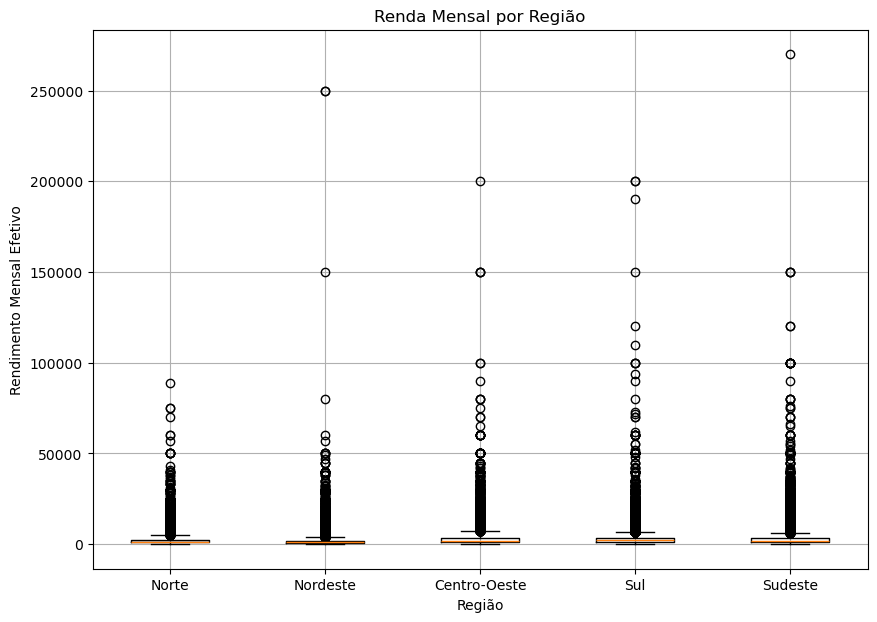

In [131]:
# RELAÇÕES BRASIL

Brasil = pd.crosstab(dados_colunas['Regiao'],dados_colunas['Nível de Instruçao'])
display(Brasil)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([dados_colunas_Norte['Rendimento Mensal Efetivo'],dados_colunas_Nordeste['Rendimento Mensal Efetivo'],
dados_colunas_Centro_Oeste['Rendimento Mensal Efetivo'],dados_colunas_Sul['Rendimento Mensal Efetivo'],
dados_colunas_Sudeste['Rendimento Mensal Efetivo']],labels=['Norte', 'Nordeste', 'Centro-Oeste', 'Sul', 'Sudeste'],)

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Região')
plt.title('Renda Mensal por Região')
plt.show()

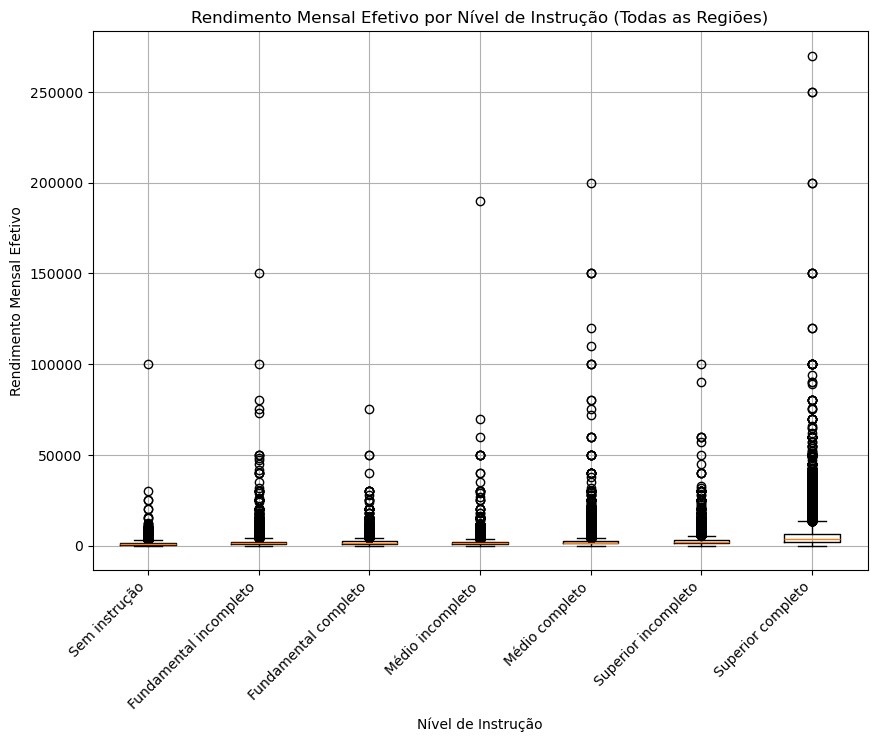

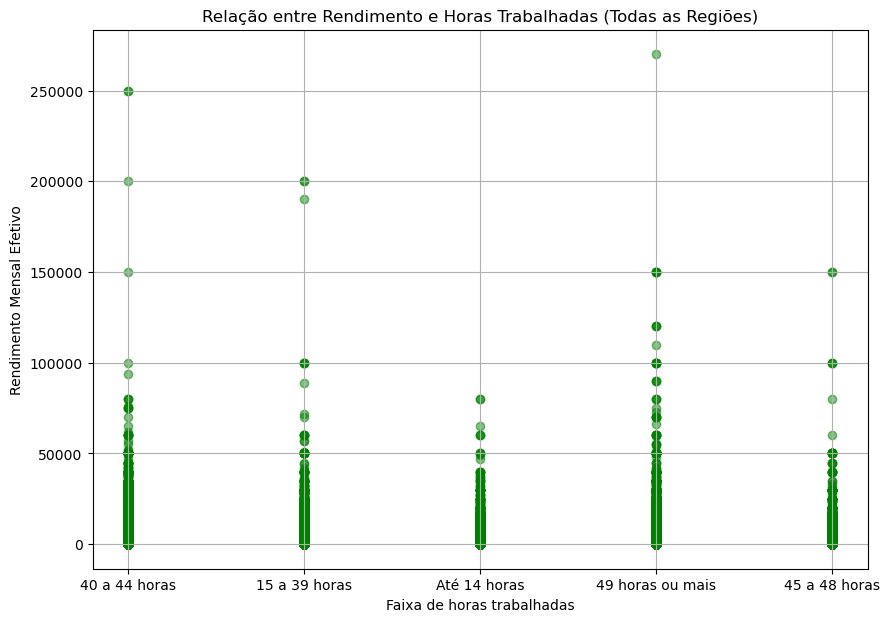

In [132]:
plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
],labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução (Todas as Regiões)')
plt.xticks(rotation=45, ha='right')
plt.show()

# --------------------------------------------

rendimento_geral = dados_colunas['Rendimento Mensal Efetivo']
horas_trabalhadas_geral = dados_colunas['Faixa de horas trabalhadas']

plt.figure(figsize=(10, 7))
plt.scatter(horas_trabalhadas_geral, rendimento_geral, color='green', alpha=0.5)
plt.title('Relação entre Rendimento e Horas Trabalhadas (Todas as Regiões)')
plt.xlabel('Faixa de horas trabalhadas')
plt.ylabel('Rendimento Mensal Efetivo')
plt.grid()
plt.show()

### REGIÃO NORTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5,5 a 10,10 a 20,20 ou mais
Nível de Instruçao,,,,,,,,,
Sem instrução e menos de 1 ano de estudo,74,280,357,224,37,28,5,1,0
Fundamental incompleto ou equivalente,394,1465,1883,1388,308,155,51,14,2
Fundamental completo ou equivalente,83,286,541,463,117,58,21,9,1
Médio incompleto ou equivalente,61,330,613,508,78,52,13,5,0
Médio completo ou equivalente,232,1036,3039,3181,857,513,148,46,4
Superior incompleto ou equivalente,29,107,445,459,156,107,43,10,2
Superior completo,29,95,514,1231,925,1204,741,228,45


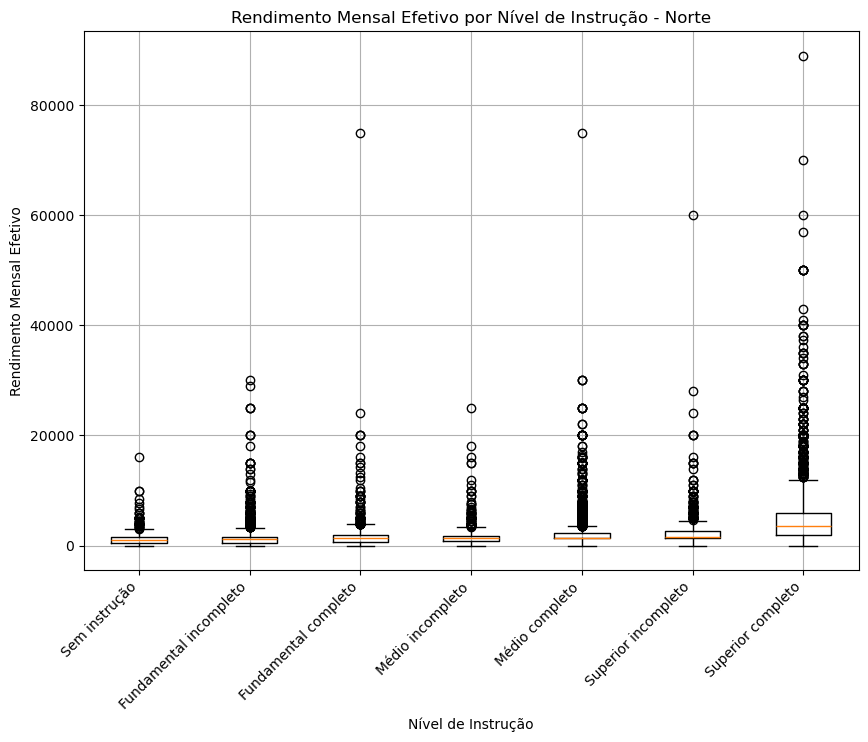

In [133]:
# RELAÇÕES - REGIÃO NORTE

Norte = pd.crosstab(dados_colunas_Norte['Nível de Instruçao'],dados_colunas_Norte['Faixa de Rendimento [em SM]'])
display(Norte)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Norte')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO NORDESTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5,5 a 10,10 a 20,20 ou mais
Nível de Instruçao,,,,,,,,,
Sem instrução e menos de 1 ano de estudo,201,1500,887,294,35,20,3,1,0
Fundamental incompleto ou equivalente,646,5604,5044,1944,292,161,44,14,4
Fundamental completo ou equivalente,149,1150,1332,698,137,69,16,8,3
Médio incompleto ou equivalente,107,1068,1332,705,114,58,21,1,4
Médio completo ou equivalente,399,3525,7506,5199,1051,669,222,47,7
Superior incompleto ou equivalente,43,288,987,735,219,147,72,18,10
Superior completo,106,307,1519,2335,1454,1811,1012,337,86


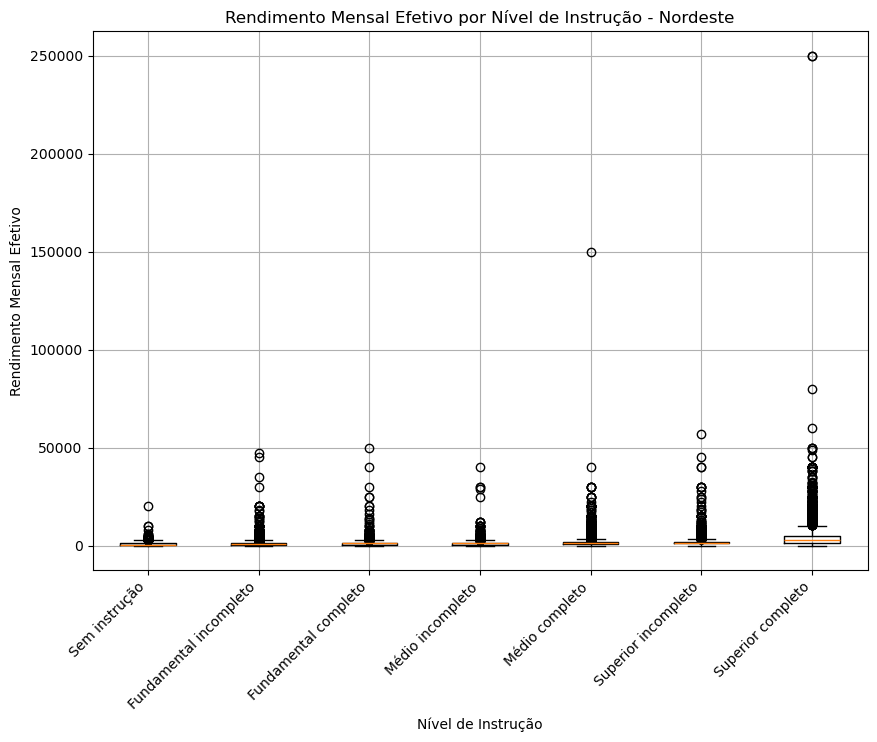

In [134]:
# RELAÇÕES - REGIÃO Nordeste

Nordeste = pd.crosstab(dados_colunas_Nordeste['Nível de Instruçao'],dados_colunas_Nordeste['Faixa de Rendimento [em SM]'])
display(Nordeste)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Nordeste')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO CENTRO-OESTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5,5 a 10,10 a 20,20 ou mais
Nível de Instruçao,,,,,,,,,
Sem instrução e menos de 1 ano de estudo,15,80,153,160,51,15,7,3,2
Fundamental incompleto ou equivalente,125,525,1131,1778,572,338,90,15,10
Fundamental completo ou equivalente,29,135,343,597,204,116,37,11,2
Médio incompleto ou equivalente,28,121,388,701,222,125,27,6,6
Médio completo ou equivalente,118,352,1510,3177,1055,825,280,67,22
Superior incompleto ou equivalente,24,63,350,565,211,175,79,24,8
Superior completo,50,50,337,1143,951,1462,1125,473,153


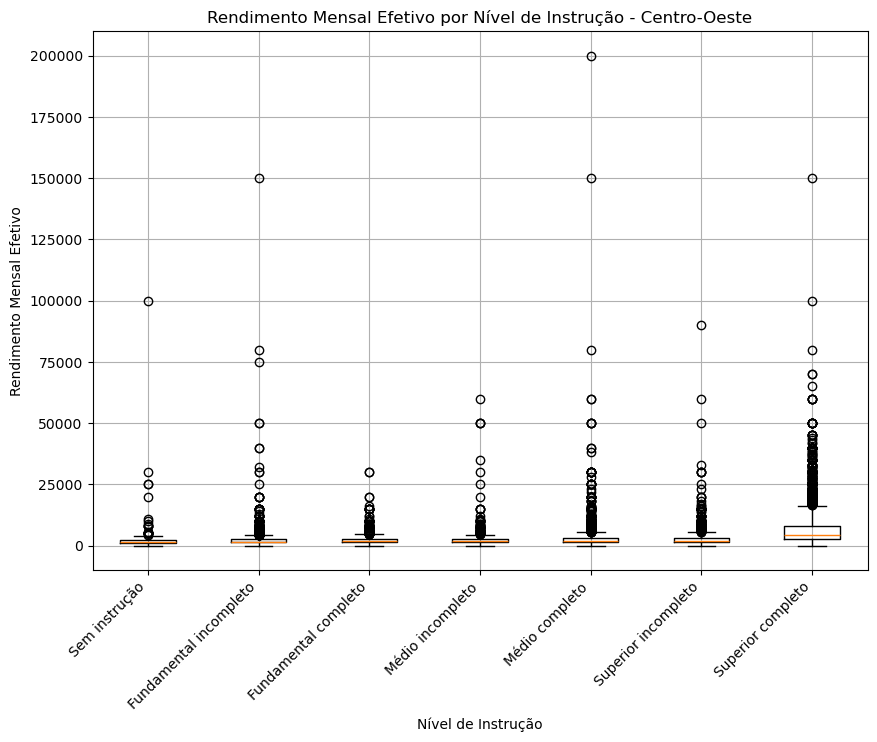

In [135]:
# RELAÇÕES - REGIÃO Centro-Oeste

Centro_Oeste = pd.crosstab(dados_colunas_Centro_Oeste['Nível de Instruçao'],dados_colunas_Centro_Oeste['Faixa de Rendimento [em SM]'])
display(Centro_Oeste)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Centro-Oeste')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO SUDESTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5,5 a 10,10 a 20,20 ou mais
Nível de Instruçao,,,,,,,,,
Sem instrução e menos de 1 ano de estudo,23,143,266,307,65,26,14,1,0
Fundamental incompleto ou equivalente,365,1512,3435,4201,877,468,109,23,5
Fundamental completo ou equivalente,96,324,1162,1714,432,234,48,7,2
Médio incompleto ou equivalente,68,330,965,1407,282,182,40,11,3
Médio completo ou equivalente,307,1118,4590,9533,2897,1885,516,125,25
Superior incompleto ou equivalente,47,149,626,1301,477,441,188,44,5
Superior completo,98,171,716,3109,2409,3512,2625,1089,332


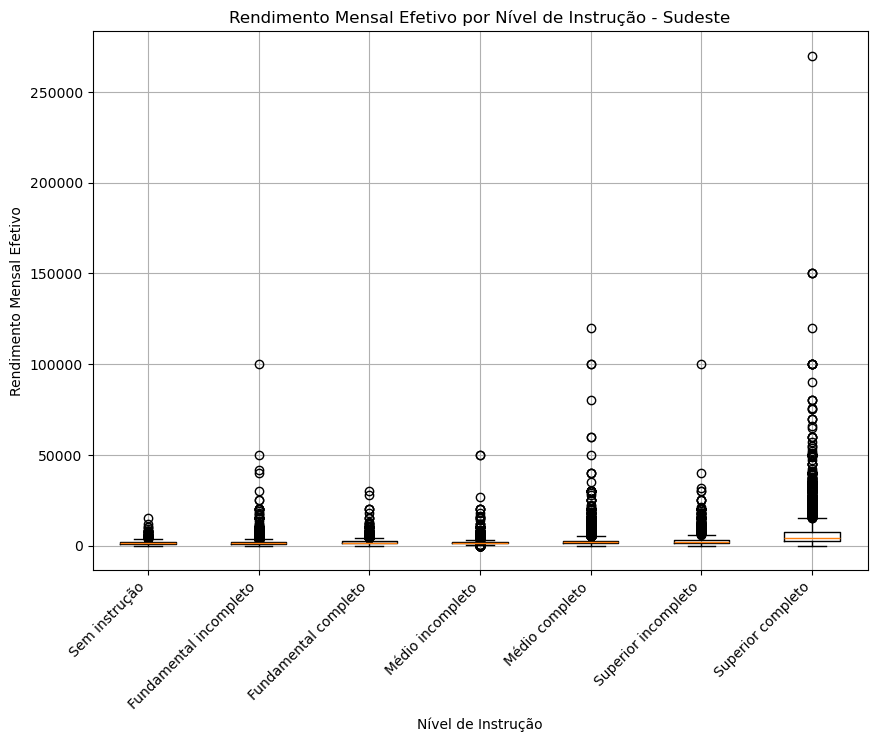

In [136]:
# RELAÇÕES - REGIÃO Sudeste

Sudeste = pd.crosstab(dados_colunas_Sudeste['Nível de Instruçao'],dados_colunas_Sudeste['Faixa de Rendimento [em SM]'])
display(Sudeste)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Sudeste')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO SUL

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5,5 a 10,10 a 20,20 ou mais
Nível de Instruçao,,,,,,,,,
Sem instrução e menos de 1 ano de estudo,14,54,92,289,56,24,13,1,0
Fundamental incompleto ou equivalente,373,724,1596,3325,963,549,132,38,4
Fundamental completo ou equivalente,106,223,561,1694,584,300,67,20,3
Médio incompleto ou equivalente,51,135,410,1152,337,201,47,5,4
Médio completo ou equivalente,223,368,1442,6345,2306,1541,449,70,18
Superior incompleto ou equivalente,41,79,322,1010,439,388,156,28,6
Superior completo,100,52,341,1902,1546,2468,1579,609,153


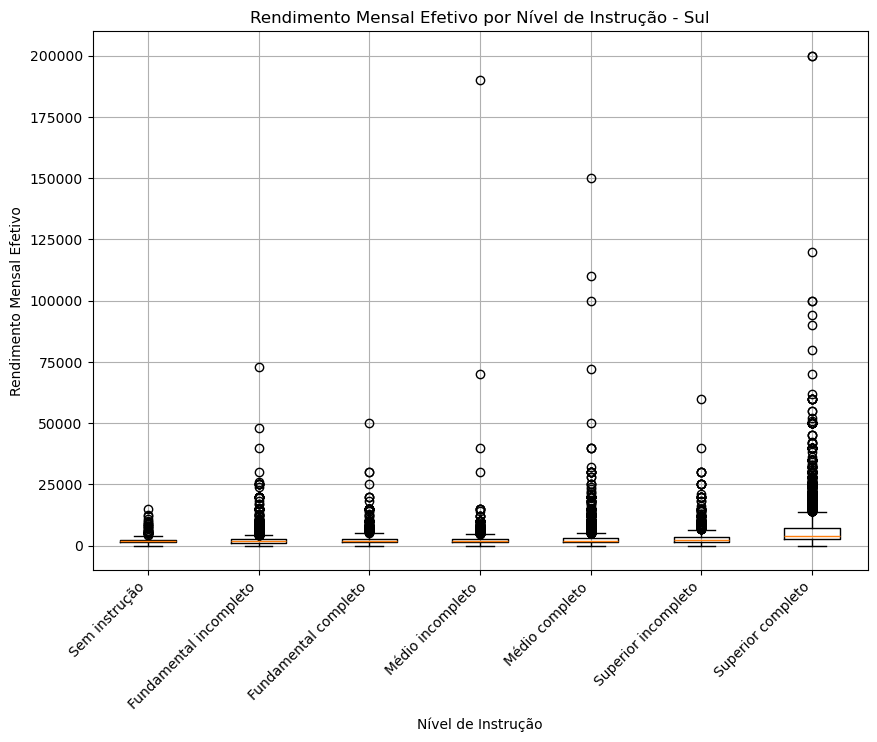

In [137]:
# RELAÇÕES - REGIÃO Sul

Sul = pd.crosstab(dados_colunas_Sul['Nível de Instruçao'],dados_colunas_Sul['Faixa de Rendimento [em SM]'])
display(Sul)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Sul')
plt.xticks(rotation=45, ha='right')
plt.show()

In [138]:
tamanho=len(dados_colunas)
tamanho_treino=len(dados_colunas)*0.8
dados_colunas2=dados_colunas.sample(int(tamanho))
dados_colunas_treino=dados_colunas2.iloc[:int(tamanho_treino)]
dados_colunas_teste=dados_colunas2.iloc[int(tamanho_treino):tamanho]
dados_colunas_teste

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio,Regiao
51021,Pará,Homem,Parda,55,Sim,Sim,Fundamental completo ou equivalente,Empregador,40 a 44 horas,0,0,Urbana,Norte
402052,Rio Grande do Sul,Homem,Branca,56,Sim,Sim,Médio completo ou equivalente,Empregado setor privado,40 a 44 horas,6000,3 a 5,Urbana,Sul
72710,Maranhão,Mulher,Parda,61,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,1320,"0,5 a 1",Urbana,Nordeste
462628,Goiás,Mulher,Branca,49,Sim,Sim,Médio completo ou equivalente,Trabalhador doméstico,15 a 39 horas,1600,1 a 2,Urbana,Centro-Oeste
89717,Maranhão,Mulher,Parda,38,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,160,"0 a 0,5",Rural,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286219,Rio de Janeiro,Homem,Preta,49,Sim,Sim,Médio completo ou equivalente,Empregado setor privado,40 a 44 horas,1530,1 a 2,Urbana,Sudeste
201837,Bahia,Homem,Branca,36,Sim,Sim,Fundamental incompleto ou equivalente,Empregador,Até 14 horas,600,"0 a 0,5",Rural,Nordeste
432419,Mato Grosso do Sul,Homem,Branca,67,Sim,Sim,Superior completo,Empregado setor privado,45 a 48 horas,2800,2 a 3,Urbana,Centro-Oeste
114845,Ceará,Mulher,Parda,34,Sim,Sim,Superior completo,Empregador,40 a 44 horas,1500,1 a 2,Urbana,Nordeste


In [139]:
dados_colunas_treino

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio,Regiao
189090,Alagoas,Mulher,Parda,23,Sim,Sim,Médio completo ou equivalente,Trabalhador doméstico,40 a 44 horas,800,"0,5 a 1",Rural,Nordeste
223810,Minas Gerais,Homem,Parda,51,Sim,Sim,Fundamental incompleto ou equivalente,Empregado setor privado,40 a 44 horas,3000,2 a 3,Urbana,Sudeste
80488,Maranhão,Mulher,Branca,40,Sim,Sim,Fundamental completo ou equivalente,Empregador,15 a 39 horas,400,"0 a 0,5",Rural,Nordeste
199773,Bahia,Homem,Branca,52,Sim,Sim,Fundamental incompleto ou equivalente,Empregado setor privado,15 a 39 horas,0,0,Rural,Nordeste
438139,Mato Grosso,Homem,Branca,49,Sim,Sim,Médio completo ou equivalente,Conta própria,15 a 39 horas,30000,20 ou mais,Urbana,Centro-Oeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434955,Mato Grosso do Sul,Mulher,Parda,27,Sim,Sim,Médio incompleto ou equivalente,Empregado setor privado,15 a 39 horas,700,"0,5 a 1",Urbana,Centro-Oeste
297769,Rio de Janeiro,Homem,Branca,43,Sim,Sim,Médio completo ou equivalente,Empregado setor privado,40 a 44 horas,2500,1 a 2,Urbana,Sudeste
403540,Rio Grande do Sul,Mulher,Branca,56,Sim,Sim,Médio completo ou equivalente,Empregado setor privado,40 a 44 horas,1800,1 a 2,Urbana,Sul
293995,Rio de Janeiro,Mulher,Parda,46,Sim,Sim,Médio incompleto ou equivalente,Trabalhador doméstico,40 a 44 horas,1320,"0,5 a 1",Urbana,Sudeste


In [194]:
#regressao

a=pd.get_dummies(dados_colunas,dtype=int, drop_first=True)
dados_colunas4=pd.concat([a],axis=1)
print(a)
dados_colunas4['Situacao do Domicílio_Rural']

        Idade  Rendimento Mensal Efetivo  Estado_Acre  Estado_Amazonas  \
0          31                       5000            0                0   
2          50                       3500            0                0   
7          55                       3500            0                0   
9          36                       3000            0                0   
11         33                       3000            0                0   
...       ...                        ...          ...              ...   
473193     49                      11000            0                0   
473197     46                       2600            0                0   
473202     24                       5000            0                0   
473203     51                       5000            0                0   
473204     56                       3500            0                0   

        Estado_Roraima  Estado_Pará  Estado_Amapá  Estado_Tocantins  \
0                    0            0     

0         0
2         0
7         0
9         0
11        0
         ..
473193    0
473197    0
473202    0
473203    0
473204    0
Name: Situacao do Domicílio_Rural, Length: 197873, dtype: int32

In [196]:
# def regress(Y,X):
#     '''
#     Y: coluna do DataFrame utilizada como variável resposta (TARGET)
#     X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
#     '''
#     X_cp = sm.add_constant(X)
#     model = sm.OLS(Y,X_cp)
#     results = model.fit()
    
#     return results
import numpy as np
dados_colunas4['Rendimento Mensal Efetivo']=dados_colunas4['Rendimento Mensal Efetivo'].astype('int32')
dados_colunas4['Idade']=dados_colunas4["Idade"].astype('int32')
dados_colunas4['Situacao do Domicílio_Rural']=dados_colunas4['Situacao do Domicílio_Rural'].astype('int32')
# dados_colunas4['Situacao do Domicílio_Rural']

lista=dados_colunas4.columns
i=27
# while i<len(lista):
#     print(lista[i])
#     i+=1
print(lista[28])


Sexo_Mulher


In [197]:
X = dados_colunas4[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade',       'Frequentou a Escola_Não',
       'Nível de Instruçao_Fundamental incompleto ou equivalente',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Amarela', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas4['Rendimento Mensal Efetivo']

def regress(Y, X):
    X_cp = sm.add_constant(X)  # Adiciona o intercepto
    model = sm.OLS(Y, X_cp)    # Define o modelo de regressão
    results = model.fit()      # Ajusta o modelo aos dados
    return results

results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.223
Model:                                   OLS   Adj. R-squared:                  0.223
Method:                        Least Squares   F-statistic:                     2105.
Date:                       Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                               15:27:54   Log-Likelihood:            -1.9097e+06
No. Observations:                     197873   AIC:                         3.820e+06
Df Residuals:                         197845   BIC:                         3.820e+06
Df Model:                                 27                                         
Covariance Type:                   nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     1516.8782    109.714     13.826      0.000    1301.842    1731.915
Regiao_Nordeste                                          -1142.1873     30.134    -37.903      0.000   -1201.250   -1083.124
Regiao_Norte                                              -836.0179     34.710    -24.085      0.000    -904.050    -767.986
Regiao_Sudeste                                            -343.8559     29.562    -11.632      0.000    -401.796    -285.916
Regiao_Sul                                                -271.5938     32.384     -8.387      0.000    -335.065    -208.123
Idade                                                       30.6659      0.719     42.666      0.000      29.257      32.075
Frequentou a Escola_Não                                    202.9141    104.075      1.950      0.051      -1.070     406.899
Nível de Instruçao_Fundamental incompleto ou equivalente   116.4527     91.516      1.272      0.203     -62.917     295.822
Nível de Instruçao_Fundamental completo ou equivalente     411.3818     96.750      4.252      0.000     221.755     601.009
Nível de Instruçao_Médio incompleto ou equivalente         633.2202     98.029      6.460      0.000     441.086     825.355
Nível de Instruçao_Médio completo ou equivalente           867.1923     93.084      9.316      0.000     684.751    1049.634
Nível de Instruçao_Superior incompleto ou equivalente     1389.3707     99.455     13.970      0.000    1194.441    1584.301
Nível de Instruçao_Superior completo                      3881.0357     94.465     41.084      0.000    3695.887    4066.184
Tipo de Ocupacao_Militar ou segurança pública             3145.8798    101.946     30.858      0.000    2946.068    3345.692
Tipo de Ocupacao_Empregado setor privado                   208.0885     37.482      5.552      0.000     134.625     281.552
Tipo de Ocupacao_Empregado setor público                  1016.7853     43.373     23.443      0.000     931.775    1101.795
Tipo de Ocupacao_Conta própria                            3519.2984     55.130     63.837      0.000    3411.246    3627.351
Tipo de Ocupacao_Empregador                               -105.2906     38.096     -2.764      0.006    -179.959     -30.623
Tipo de Ocupacao_Trabalhador familiar não remunerado      3.479e-11   1.98e-11      1.753      0.080    -4.1e-12    7.37e-11
Faixa de horas trabalhadas_15 a 39 horas                  -659.8369     24.382    -27.062      0.000    -707.626    -612.048
Faixa de horas trabalhadas_40 a 44 horas                  -233.1527     20.800    -11.210      0.000    -273.919    -192.386
Sexo_M

In [199]:
X = dados_colunas4[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade',
        'Frequentou a Escola_Não',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Amarela', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas4['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.223
Model:                                   OLS   Adj. R-squared:                  0.223
Method:                        Least Squares   F-statistic:                     2186.
Date:                       Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                               15:29:18   Log-Likelihood:            -1.9097e+06
No. Observations:                     197873   AIC:                         3.820e+06
Df Residuals:                         197846   BIC:                         3.820e+06
Df Model:                                 26                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1631.8596     62.227     26.224      0.000    1509.896    1753.823
Regiao_Nordeste                                        -1142.6957     30.132    -37.923      0.000   -1201.753   -1083.638
Regiao_Norte                                            -835.9882     34.711    -24.085      0.000    -904.020    -767.956
Regiao_Sudeste                                          -343.4238     29.560    -11.618      0.000    -401.360    -285.487
Regiao_Sul                                              -271.2440     32.382     -8.376      0.000    -334.713    -207.775
Idade                                                     30.6434      0.719     42.648      0.000      29.235      32.052
Frequentou a Escola_Não                                  105.0804     70.146      1.498      0.134     -32.404     242.565
Nível de Instruçao_Fundamental completo ou equivalente   297.5932     36.934      8.057      0.000     225.204     369.983
Nível de Instruçao_Médio incompleto ou equivalente       519.2911     39.919     13.009      0.000     441.050     597.532
Nível de Instruçao_Médio completo ou equivalente         753.2945     25.550     29.483      0.000     703.217     803.372
Nível de Instruçao_Superior incompleto ou equivalente   1275.3047     43.081     29.603      0.000    1190.867    1359.742
Nível de Instruçao_Superior completo                    3767.1181     30.150    124.944      0.000    3708.024    3826.212
Tipo de Ocupacao_Militar ou segurança pública           3145.5926    101.946     30.855      0.000    2945.781    3345.404
Tipo de Ocupacao_Empregado setor privado                 207.8669     37.481      5.546      0.000     134.404     281.330
Tipo de Ocupacao_Empregado setor público                1016.7590     43.373     23.442      0.000     931.749    1101.769
Tipo de Ocupacao_Conta própria                          3519.2008     55.130     63.835      0.000    3411.148    3627.254
Tipo de Ocupacao_Empregador                             -105.5675     38.096     -2.771      0.006    -180.234     -30.901
Tipo de Ocupacao_Trabalhador familiar não remunerado   -5.887e-12   3.85e-12     -1.529      0.126   -1.34e-11    1.66e-12
Faixa de horas trabalhadas_15 a 39 horas                -659.8556     24.382    -27.063      0.000    -707.645    -612.067
Faixa de horas trabalhadas_40 a 44 horas                -233.1972     20.800    -11.212      0.000    -273.964    -192.431
Sexo_Mulher                                            -1043.5066     18.658    -55.928      0.000   -1080.076   -1006.937
Cor_Raça_Preta                                        

In [200]:
X = dados_colunas4[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Amarela', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas4['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.223
Model:                                   OLS   Adj. R-squared:                  0.223
Method:                        Least Squares   F-statistic:                     2273.
Date:                       Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                               15:30:37   Log-Likelihood:            -1.9097e+06
No. Observations:                     197873   AIC:                         3.820e+06
Df Residuals:                         197847   BIC:                         3.820e+06
Df Model:                                 25                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1634.2174     62.207     26.271      0.000    1512.293    1756.142
Regiao_Nordeste                                        -1143.0918     30.131    -37.938      0.000   -1202.147   -1084.036
Regiao_Norte                                            -835.1496     34.706    -24.063      0.000    -903.173    -767.126
Regiao_Sudeste                                          -343.4289     29.560    -11.618      0.000    -401.366    -285.492
Regiao_Sul                                              -271.0559     32.382     -8.371      0.000    -334.524    -207.587
Idade                                                     30.6588      0.718     42.673      0.000      29.251      32.067
Nível de Instruçao_Fundamental completo ou equivalente   294.3729     36.871      7.984      0.000     222.106     366.640
Nível de Instruçao_Médio incompleto ou equivalente       516.1750     39.865     12.948      0.000     438.040     594.310
Nível de Instruçao_Médio completo ou equivalente         750.0569     25.459     29.462      0.000     700.158     799.955
Nível de Instruçao_Superior incompleto ou equivalente   1272.0909     43.027     29.565      0.000    1187.758    1356.424
Nível de Instruçao_Superior completo                    3763.7130     30.065    125.187      0.000    3704.787    3822.639
Tipo de Ocupacao_Militar ou segurança pública           3145.7871    101.946     30.857      0.000    2945.975    3345.599
Tipo de Ocupacao_Empregado setor privado                 207.9138     37.482      5.547      0.000     134.451     281.377
Tipo de Ocupacao_Empregado setor público                1016.9124     43.373     23.446      0.000     931.902    1101.923
Tipo de Ocupacao_Conta própria                          3519.0297     55.130     63.832      0.000    3410.977    3627.082
Tipo de Ocupacao_Empregador                             -105.4146     38.096     -2.767      0.006    -180.082     -30.748
Tipo de Ocupacao_Trabalhador familiar não remunerado    5.966e-12   2.47e-12      2.415      0.016    1.12e-12    1.08e-11
Faixa de horas trabalhadas_15 a 39 horas                -659.8845     24.382    -27.064      0.000    -707.674    -612.095
Faixa de horas trabalhadas_40 a 44 horas                -232.7550     20.797    -11.192      0.000    -273.518    -191.992
Sexo_Mulher                                            -1043.4056     18.658    -55.922      0.000   -1079.975   -1006.836
Cor_Raça_Preta                                          -587.2391     29.744    -19.743      0.000    -645.537    -528.941
Cor_Raça_Amarela                                      

In [201]:
X = dados_colunas4[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Cor_Raça_Ignorado', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas4['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.223
Model:                                   OLS   Adj. R-squared:                  0.223
Method:                        Least Squares   F-statistic:                     2368.
Date:                       Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                               15:31:33   Log-Likelihood:            -1.9097e+06
No. Observations:                     197873   AIC:                         3.820e+06
Df Residuals:                         197848   BIC:                         3.820e+06
Df Model:                                 24                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1637.0502     62.183     26.326      0.000    1515.174    1758.927
Regiao_Nordeste                                        -1143.1743     30.131    -37.940      0.000   -1202.230   -1084.118
Regiao_Norte                                            -835.0396     34.706    -24.060      0.000    -903.063    -767.016
Regiao_Sudeste                                          -343.5230     29.560    -11.621      0.000    -401.460    -285.586
Regiao_Sul                                              -272.6457     32.367     -8.423      0.000    -336.085    -209.206
Idade                                                     30.6618      0.718     42.678      0.000      29.254      32.070
Nível de Instruçao_Fundamental completo ou equivalente   294.2001     36.871      7.979      0.000     221.933     366.467
Nível de Instruçao_Médio incompleto ou equivalente       516.5598     39.865     12.958      0.000     438.426     594.694
Nível de Instruçao_Médio completo ou equivalente         750.2674     25.459     29.470      0.000     700.369     800.165
Nível de Instruçao_Superior incompleto ou equivalente   1272.3023     43.027     29.570      0.000    1187.970    1356.635
Nível de Instruçao_Superior completo                    3764.1745     30.064    125.207      0.000    3705.251    3823.098
Tipo de Ocupacao_Militar ou segurança pública           3145.1501    101.946     30.851      0.000    2945.339    3344.962
Tipo de Ocupacao_Empregado setor privado                 207.9548     37.482      5.548      0.000     134.492     281.418
Tipo de Ocupacao_Empregado setor público                1016.6311     43.373     23.439      0.000     931.621    1101.641
Tipo de Ocupacao_Conta própria                          3519.0853     55.130     63.833      0.000    3411.032    3627.138
Tipo de Ocupacao_Empregador                             -105.4049     38.096     -2.767      0.006    -180.072     -30.738
Tipo de Ocupacao_Trabalhador familiar não remunerado    1.304e-11   7.87e-12      1.657      0.098   -2.38e-12    2.85e-11
Faixa de horas trabalhadas_15 a 39 horas                -659.8498     24.383    -27.062      0.000    -707.639    -612.061
Faixa de horas trabalhadas_40 a 44 horas                -232.8863     20.797    -11.198      0.000    -273.649    -192.124
Sexo_Mulher                                            -1043.3537     18.658    -55.919      0.000   -1079.923   -1006.784
Cor_Raça_Preta                                          -590.1072     29.691    -19.875      0.000    -648.301    -531.913
Cor_Raça_Parda                                        

In [202]:
X = dados_colunas4[['Regiao_Nordeste','Regiao_Norte','Regiao_Sudeste','Regiao_Sul','Idade',
       'Nível de Instruçao_Fundamental completo ou equivalente',
       'Nível de Instruçao_Médio incompleto ou equivalente',
       'Nível de Instruçao_Médio completo ou equivalente',
       'Nível de Instruçao_Superior incompleto ou equivalente',
       'Nível de Instruçao_Superior completo',
        'Tipo de Ocupacao_Militar ou segurança pública',
       'Tipo de Ocupacao_Empregado setor privado',
       'Tipo de Ocupacao_Empregado setor público',
       'Tipo de Ocupacao_Conta própria', 'Tipo de Ocupacao_Empregador',
       'Tipo de Ocupacao_Trabalhador familiar não remunerado',
       'Faixa de horas trabalhadas_15 a 39 horas',
       'Faixa de horas trabalhadas_40 a 44 horas',
        'Sexo_Mulher', 'Cor_Raça_Preta', 'Cor_Raça_Parda',
       'Cor_Raça_Indígena', 'Alfabetizado_Não','Situacao do Domicílio_Rural']]
Y = dados_colunas4['Rendimento Mensal Efetivo']
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Rendimento Mensal Efetivo   R-squared:                       0.223
Model:                                   OLS   Adj. R-squared:                  0.223
Method:                        Least Squares   F-statistic:                     2471.
Date:                       Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                               15:32:31   Log-Likelihood:            -1.9098e+06
No. Observations:                     197873   AIC:                         3.820e+06
Df Residuals:                         197849   BIC:                         3.820e+06
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1636.3900     62.182     26.316      0.000    1514.515    1758.265
Regiao_Nordeste                                        -1143.2715     30.131    -37.943      0.000   -1202.327   -1084.216
Regiao_Norte                                            -834.8393     34.706    -24.054      0.000    -902.863    -766.816
Regiao_Sudeste                                          -343.3457     29.560    -11.615      0.000    -401.282    -285.409
Regiao_Sul                                              -272.2099     32.367     -8.410      0.000    -335.647    -208.772
Idade                                                     30.6637      0.718     42.680      0.000      29.256      32.072
Nível de Instruçao_Fundamental completo ou equivalente   294.2823     36.872      7.981      0.000     222.015     366.550
Nível de Instruçao_Médio incompleto ou equivalente       516.7425     39.865     12.962      0.000     438.609     594.877
Nível de Instruçao_Médio completo ou equivalente         750.3046     25.459     29.472      0.000     700.406     800.203
Nível de Instruçao_Superior incompleto ou equivalente   1272.5896     43.027     29.576      0.000    1188.257    1356.922
Nível de Instruçao_Superior completo                    3764.2223     30.064    125.208      0.000    3705.298    3823.146
Tipo de Ocupacao_Militar ou segurança pública           3145.2655    101.946     30.852      0.000    2945.453    3345.078
Tipo de Ocupacao_Empregado setor privado                 207.9512     37.482      5.548      0.000     134.488     281.415
Tipo de Ocupacao_Empregado setor público                1016.5052     43.373     23.436      0.000     931.495    1101.515
Tipo de Ocupacao_Conta própria                          3518.6438     55.130     63.825      0.000    3410.591    3626.696
Tipo de Ocupacao_Empregador                             -105.4275     38.096     -2.767      0.006    -180.095     -30.760
Tipo de Ocupacao_Trabalhador familiar não remunerado    3.133e-13   2.46e-14     12.756      0.000    2.65e-13    3.61e-13
Faixa de horas trabalhadas_15 a 39 horas                -659.9163     24.383    -27.065      0.000    -707.706    -612.127
Faixa de horas trabalhadas_40 a 44 horas                -232.9471     20.797    -11.201      0.000    -273.710    -192.185
Sexo_Mulher                                            -1043.3793     18.658    -55.921      0.000   -1079.949   -1006.810
Cor_Raça_Preta                                          -589.6112     29.690    -19.859      0.000    -647.803    -531.420
Cor_Raça_Parda                                        